# PGE Load Profile Data


In [1]:
import pgande
from datetime import datetime

start = '3/1/20'
stop = '3/31/20'
data = pgande.get_loads(datetime.strptime(start,'%m/%d/%y'),
                        datetime.strptime(stop,'%m/%d/%y'))
print('Columns....',','.join(list(data.columns)))
print('Rows.......',data.shape[0])

ERROR: get_load_profile(date=2020-03-14 00:00:00): no data
ERROR: get_load_profile(date=2020-03-15 00:00:00): no data
ERROR: get_load_profile(date=2020-03-16 00:00:00): no data
ERROR: get_load_profile(date=2020-03-17 00:00:00): no data
ERROR: get_load_profile(date=2020-03-18 00:00:00): no data
ERROR: get_load_profile(date=2020-03-19 00:00:00): no data
ERROR: get_load_profile(date=2020-03-20 00:00:00): no data
ERROR: get_load_profile(date=2020-03-21 00:00:00): no data
ERROR: get_load_profile(date=2020-03-22 00:00:00): no data
ERROR: get_load_profile(date=2020-03-23 00:00:00): no data
ERROR: get_load_profile(date=2020-03-24 00:00:00): no data
ERROR: get_load_profile(date=2020-03-25 00:00:00): no data
ERROR: get_load_profile(date=2020-03-26 00:00:00): no data
ERROR: get_load_profile(date=2020-03-27 00:00:00): no data
ERROR: get_load_profile(date=2020-03-28 00:00:00): no data
ERROR: get_load_profile(date=2020-03-29 00:00:00): no data
ERROR: get_load_profile(date=2020-03-30 00:00:00): no da

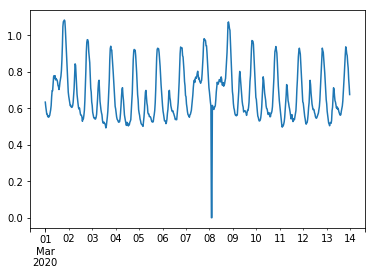

In [4]:
data["RES"].plot()

In [3]:
print('Columns....',','.join(list(data.columns)))
print('Rows.......',data.shape[0])

Columns.... A1,A10,A6,E1,E19P,E19S,E19V,E20P,E20S,E20T,RES,S19,S1M,S1S,S20,S9M,STBY
Rows....... 624
